In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [5]:
disease_df = pd.read_csv("framingham.csv")
disease_df.drop(columns=['age'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)

In [7]:
disease_df.dropna(axis = 0, inplace = True)
disease_df

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [12]:
print(disease_df.target.value_counts())

target
1    526
0    499
Name: count, dtype: int64


## Splitting the Dataset into Test and Train Sets

In [18]:
X = np.asarray(disease_df[['sex', 'cp', 'thal', 'ca', 'slope', 'oldpeak']])
y = np.asarray(disease_df['target'])

X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (717, 6) (717,)
Test set: (308, 6) (308,)


## Exploratory Data Analysis of Heart Disease Dataset

C:\Users\hp\AppData\Local\Temp\ipykernel_17680\2918459413.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=disease_df,


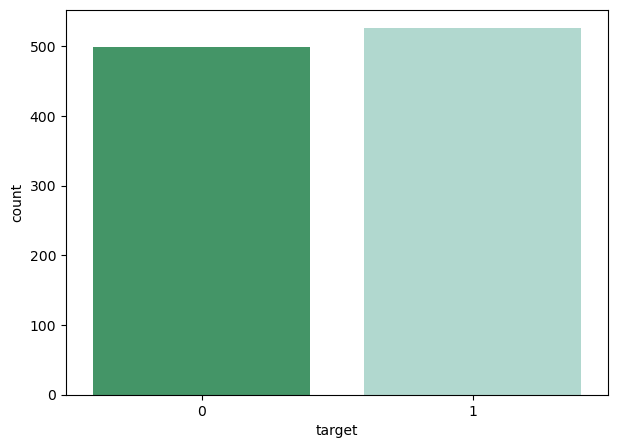

In [22]:
plt.figure(figsize=(7, 5))
sns.countplot(x='target', data=disease_df,
             palette="BuGn_r")
plt.show()

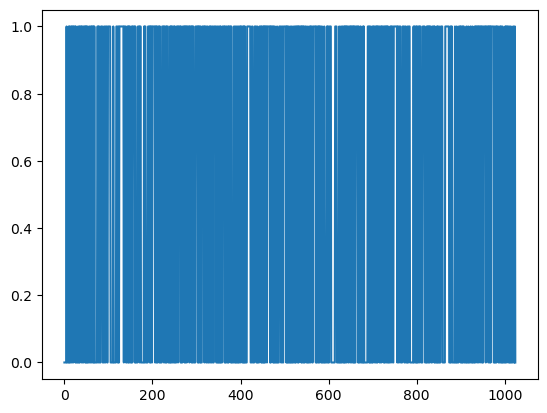

In [26]:
laste = disease_df['target'].plot()
plt.show(laste)

## Fitting Logistic Regression Model for Heart Disease Prediction

In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

## Evaluating Logistic Regression Model

In [32]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', 
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8344155844155844


The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       156
           1       0.80      0.88      0.84       152

    accuracy                           0.83       308
   macro avg       0.84      0.84      0.83       308
weighted avg       0.84      0.83      0.83       308



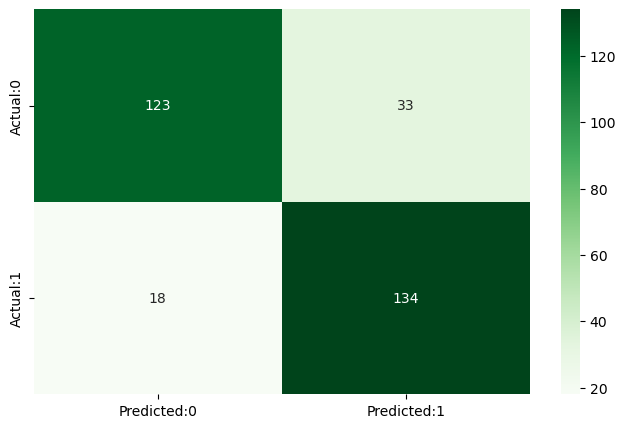

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()